In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# স্টক লিস্ট (5টি জনপ্রিয় স্টক)
stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
start_date = "2020-01-01"
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# ডেটা ডাউনলোড
data = yf.download(stocks, start=start_date, end=end_date, auto_adjust=False)['Adj Close']
print("প্রথম ৫ সারি:")
print(data.head())
print("\nশেষ ৫ সারি:")
print(data.tail())
print("\nডেটার সংক্ষিপ্ত তথ্য:")
print(data.info())





[*********************100%***********************]  5 of 5 completed

প্রথম ৫ সারি:
Ticker           AAPL       AMZN      GOOGL        MSFT       TSLA
Date                                                              
2020-01-02  72.620850  94.900497  68.026024  153.042297  28.684000
2020-01-03  71.914810  93.748497  67.670151  151.136642  29.534000
2020-01-06  72.487854  95.143997  69.473846  151.527313  30.102667
2020-01-07  72.146935  95.343002  69.339645  150.145706  31.270666
2020-01-08  73.307510  94.598503  69.833183  152.537323  32.809334

শেষ ৫ সারি:
Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA
Date                                                                  
2025-07-28  214.050003  232.789993  192.580002  512.500000  325.589996
2025-07-29  211.270004  231.009995  195.750000  512.570007  321.200012
2025-07-30  209.050003  230.190002  196.529999  513.239990  319.040009
2025-07-31  207.570007  234.110001  191.899994  533.500000  308.269989
2025-08-01  202.380005  214.750000  189.130005  524.109985  302.630005

ডেটার 

In [4]:
# দৈনিক রিটার্ন গণনা
returns = data.pct_change().dropna()
print("\nদৈনিক রিটার্নের প্রথম ৫ সারি:")
print(returns.head())

# বার্ষিক রিটার্ন ও কোভেরিয়েন্স ম্যাট্রিক্স
mu = returns.mean() * 252  # বার্ষিক গড় রিটার্ন (252 ট্রেডিং দিন)
Sigma = returns.cov() * 252  # বার্ষিক কোভেরিয়েন্স ম্যাট্রিক্স
print("\nবার্ষিক গড় রিটার্ন (mu):")
print(mu)
print("\nবার্ষিক কোভেরিয়েন্স ম্যাট্রিক্স (Sigma):")
print(Sigma)


দৈনিক রিটার্নের প্রথম ৫ সারি:
Ticker          AAPL      AMZN     GOOGL      MSFT      TSLA
Date                                                        
2020-01-03 -0.009722 -0.012139 -0.005231 -0.012452  0.029633
2020-01-06  0.007968  0.014886  0.026654  0.002585  0.019255
2020-01-07 -0.004703  0.002092 -0.001932 -0.009118  0.038801
2020-01-08  0.016086 -0.007809  0.007118  0.015929  0.049205
2020-01-09  0.021241  0.004799  0.010498  0.012493 -0.021945

বার্ষিক গড় রিটার্ন (mu):
Ticker
AAPL     0.236610
AMZN     0.211882
GOOGL    0.237138
MSFT     0.267055
TSLA     0.653247
dtype: float64

বার্ষিক কোভেরিয়েন্স ম্যাট্রিক্স (Sigma):
Ticker      AAPL      AMZN     GOOGL      MSFT      TSLA
Ticker                                                  
AAPL    0.105026  0.070314  0.067220  0.071299  0.109493
AMZN    0.070314  0.130289  0.076680  0.074463  0.110299
GOOGL   0.067220  0.076680  0.106505  0.071737  0.093433
MSFT    0.071299  0.074463  0.071737  0.091506  0.093058
TSLA    0.109493  0.

In [5]:
def optimize_portfolio(mu, Sigma, target_return):
    n = len(mu)  # স্টকের সংখ্যা
    A = np.vstack((mu, np.ones(n))).T  # কনস্ট্রেইন্ট ম্যাট্রিক্স
    b = np.array([target_return, 1])  # টার্গেট রিটার্ন ও ওয়েটের যোগফল=১
    
    # কেকেটি (KKT) ম্যাট্রিক্স তৈরি
    KKT_11 = Sigma
    KKT_12 = -A
    KKT_21 = -A.T
    KKT_22 = np.zeros((2, 2))
    KKT = np.block([[KKT_11, KKT_12], [KKT_21, KKT_22]])
    
    # সমাধান: KKT * [w, λ] = [0, -b]
    solution = np.linalg.solve(KKT, np.concatenate([np.zeros(n), -b]))
    w = solution[:n]  # অপ্টিমাল ওয়েট
    return w

# টার্গেট রিটার্ন সেট (mu-এর গড়)
target_return = np.mean(mu)
w_optimal = optimize_portfolio(mu, Sigma, target_return)
print("\nঅপ্টিমাল ওয়েট:")
for stock, weight in zip(stocks, w_optimal):
    print(f"{stock}: {weight:.4f}")

# পোর্টফোলিও রিস্ক (স্ট্যান্ডার্ড ডেভিয়েশন)
portfolio_risk = np.sqrt(w_optimal @ Sigma @ w_optimal)
print(f"\nপোর্টফোলিও রিস্ক (স্ট্যান্ডার্ড ডেভিয়েশন): {portfolio_risk:.4f}")


অপ্টিমাল ওয়েট:
AAPL: 0.1313
GOOGL: -0.0578
MSFT: 0.1960
AMZN: 0.5730
TSLA: 0.1575

পোর্টফোলিও রিস্ক (স্ট্যান্ডার্ড ডেভিয়েশন): 0.3090


In [6]:
# টার্গেট রিটার্নের রেঞ্জ (সর্বনিম্ন থেকে সর্বোচ্চ)
target_returns = np.linspace(mu.min(), mu.max(), 50)
risks = []

for r in target_returns:
    w = optimize_portfolio(mu, Sigma, r)
    risk = np.sqrt(w @ Sigma @ w)
    risks.append(risk)

# মিনিমাম রিস্ক পোর্টফোলিও
min_risk_idx = np.argmin(risks)
min_risk_return = target_returns[min_risk_idx]
min_risk = risks[min_risk_idx]

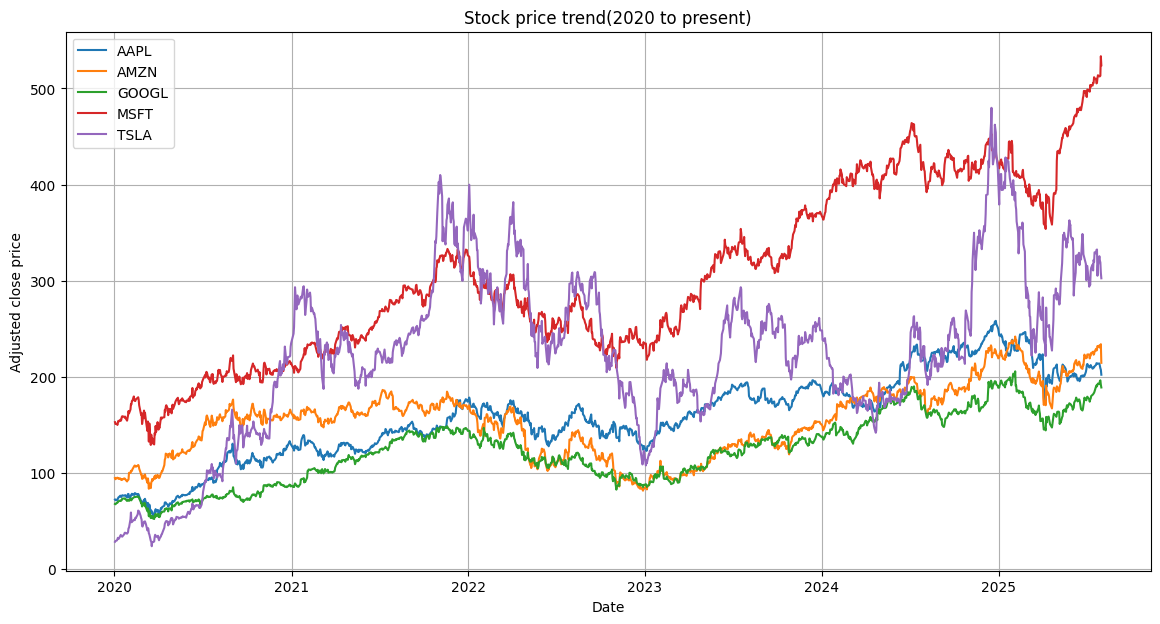

In [10]:
plt.figure(figsize=(14, 7))
for col in data.columns:
    plt.plot(data.index, data[col], label=col)
plt.title("Stock price trend(2020 to present)")
plt.xlabel("Date")
plt.ylabel("Adjusted close price")
plt.legend()
plt.grid(True)
plt.show()

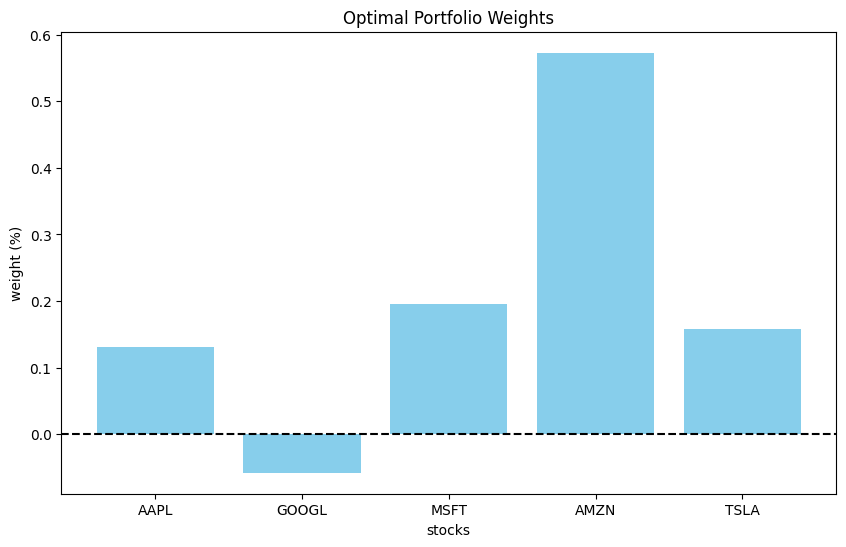

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(stocks, w_optimal, color='skyblue')
plt.title("Optimal Portfolio Weights")
plt.xlabel("stocks")
plt.ylabel("weight (%)")
plt.axhline(0, color='k', linestyle='--')  # শর্ট সেলিং লাইন
plt.show()

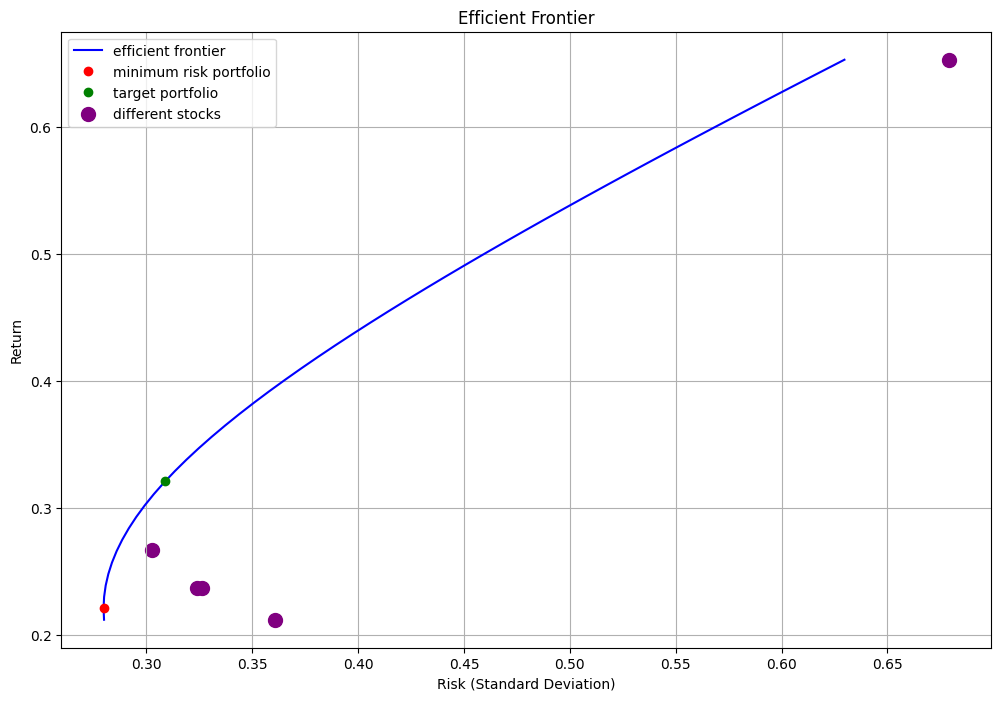

In [12]:
plt.figure(figsize=(12, 8))
# এফিসিয়েন্ট ফ্রন্টিয়ার
plt.plot(risks, target_returns, 'b-', label="efficient frontier")
# মিনিমাম রিস্ক পোর্টফোলিও
plt.plot([min_risk], [min_risk_return], 'ro', label="minimum risk portfolio")
# টার্গেট পোর্টফোলিও
plt.plot([portfolio_risk], [target_return], 'go', label="target portfolio")
# পৃথক স্টক
plt.scatter(np.sqrt(np.diag(Sigma)), mu, color='purple', s=100, label="different stocks")

plt.title("Efficient Frontier")
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.show()

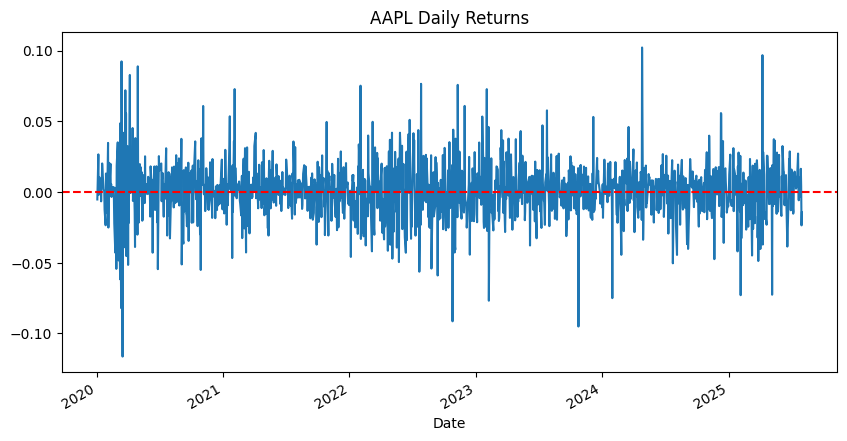

In [15]:
daily_returns = data.pct_change()
daily_returns['GOOGL'].plot(figsize=(10,5), title='AAPL Daily Returns')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()
